# Evaluation

In [30]:
import importnb
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score, classification_report

In [31]:
with importnb.Notebook():
    from Data_Cleanup import df_filtered
    from Training_ML_Models import X_test, y_test, X_train, y_train, y_pred_knn, y_pred_rf, y_pred_dt, y_pred_gb, knn, model_rf, model_dt, model_gb

df_filtered.head()

,Marital status,Application mode,Application order,Daytime/evening attendance\t,Previous qualification,Mother's qualification,Admission grade,Displaced,Debtor,Tuition fees up to date,...,Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),GDP,Target
0,1,17,5,1,1,19,127.3,1,0,1,...,0,0,0,0.000000,0,0,0,0.000000,1.74,0
1,1,15,1,1,1,1,142.5,1,0,0,...,6,6,6,14.000000,6,6,6,13.666667,0.79,1
2,1,1,5,1,1,37,124.8,1,0,0,...,6,0,0,0.000000,6,0,0,0.000000,1.74,0
3,1,17,2,1,1,38,119.6,1,0,1,...,6,8,6,13.428571,6,10,5,12.400000,-3.12,1
4,2,39,1,0,1,37,141.5,0,0,1,...,6,9,5,12.333333,6,6,6,13.000000,0.79,1


## 1. kNN

In [32]:
accuracy = accuracy_score(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)
class_report = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8751147842056933
Confusion Matrix:
[[316  99]
 [ 37 637]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       415
           1       0.87      0.95      0.90       674

    accuracy                           0.88      1089
   macro avg       0.88      0.85      0.86      1089
weighted avg       0.88      0.88      0.87      1089



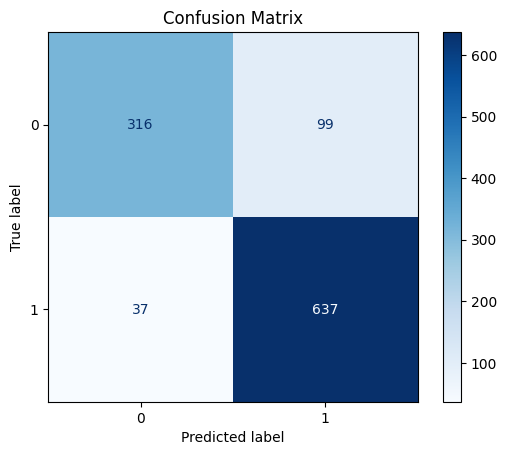

In [33]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

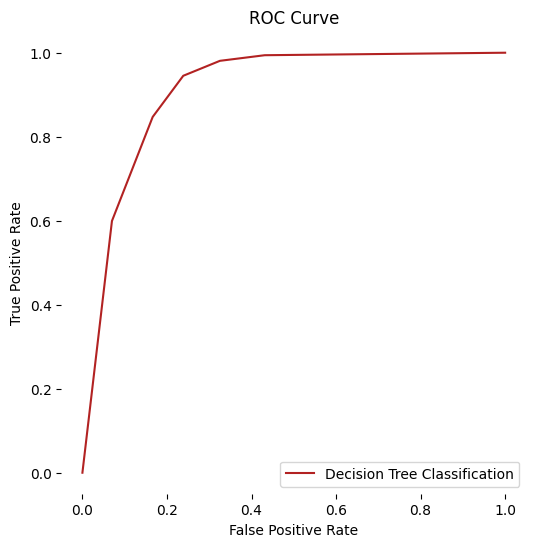

In [34]:
y_pred_probabiblity_knn = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_knn)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

## 2. Random Forest

In [35]:
accurancy_model_rf = accuracy_score(y_test, y_pred_rf)
precision_model_rf = precision_score(y_test, y_pred_rf)
recall_model_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

print("Accuracy Random Forest: ", accurancy_model_rf)
print("Precision Score Random Forest: ", precision_model_rf)
print("Recall Score Random Forest: ", recall_model_rf)
print("F1 Score Random Forest: ", f1_score_rf)

Accuracy Random Forest:  0.9109274563820018
Precision Score Random Forest:  0.9057665260196905
Recall Score Random Forest:  0.9554896142433235
F1 Score Random Forest:  0.9299638989169675


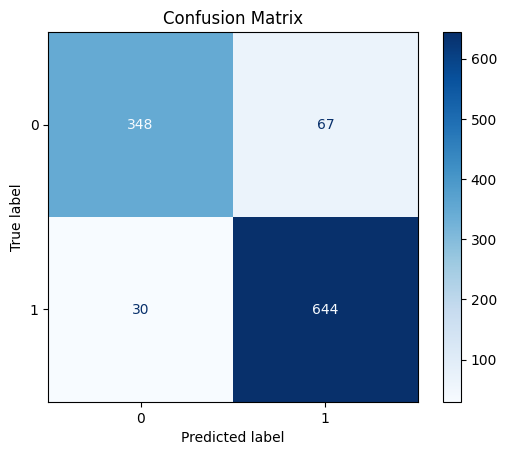

In [36]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

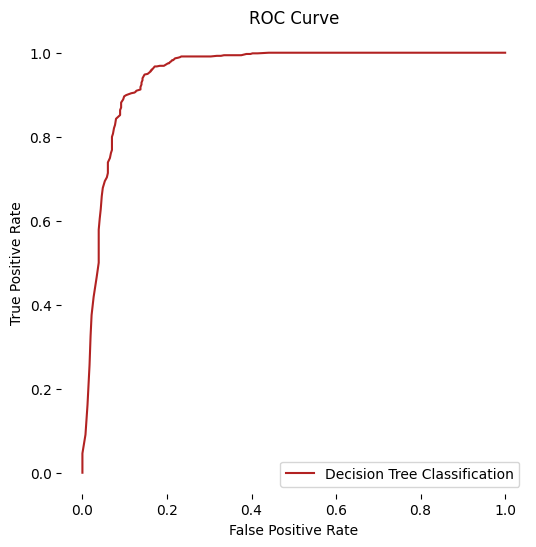

In [37]:
y_pred_probabiblity_rf = model_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_rf)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 3. Decision Trees

In [38]:
y_pred_dt = model_dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)
class_report = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8677685950413223
Confusion Matrix:
[[353  62]
 [ 82 592]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       415
           1       0.91      0.88      0.89       674

    accuracy                           0.87      1089
   macro avg       0.86      0.86      0.86      1089
weighted avg       0.87      0.87      0.87      1089



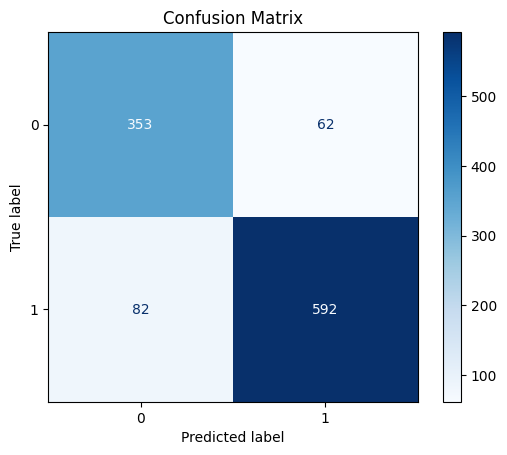

In [39]:
ConfusionMatrixDisplay(conf_matrix, display_labels=model_dt.classes_).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

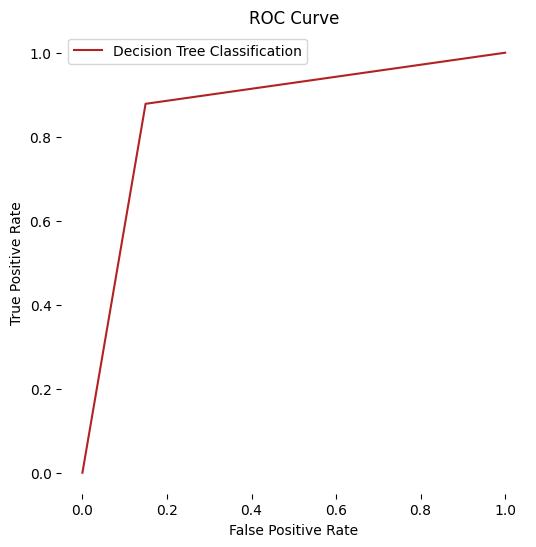

In [40]:
y_pred_probabiblity = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()

# 4. Naive Bayes

In [41]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Accurancy Score Naive Bayes: ", accuracy_gb)
print("F1 Score Naive Bayes: ", f1_gb)

Accurancy Score Naive Bayes:  0.8567493112947658
F1 Score Naive Bayes:  0.8864628820960698


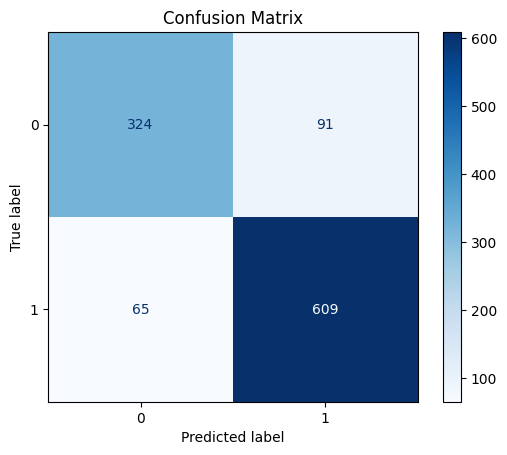

In [42]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_gb).plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

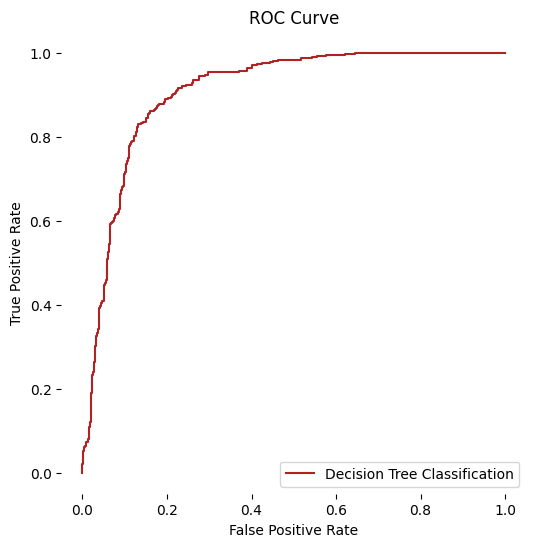

In [43]:
y_pred_probabiblity_gb = model_gb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_probabiblity_gb)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend()